In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

from xgboost import XGBClassifier
from sklearn.metrics import roc_curve

from sklearn.metrics import auc
import matplotlib.pyplot as plt
from xgboost import plot_tree
import pylab as pl
import matplotlib.pyplot as plt
from scipy.stats import sem
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score

d:\anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data = pd.read_csv("data/data/train_data_final_50k.csv", header = None)

## Data Visualization

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,613,614,615,616,617,618,619,620,621,622
0,528,158,112,23,0.150380,0.146330,0.142520,0.153820,0.148660,0.138230,...,0.149050,0.148270,0.140620,0.133380,0.134310,0.138130,0.139070,0.134450,0.124640,1
1,367,89,173,20,0.212500,0.197260,0.194210,0.215200,0.204170,0.202180,...,0.123590,0.120340,0.116290,0.114440,0.111110,0.110490,0.108930,0.106310,0.104780,1
2,283,190,55,17,0.027484,0.036190,0.046603,0.019973,0.032946,0.047286,...,0.114170,0.111660,0.111410,0.111810,0.110960,0.109900,0.109130,0.108310,0.106670,0
3,424,166,90,29,0.174210,0.170880,0.174460,0.190960,0.182380,0.176380,...,0.109080,0.103190,0.096503,0.091461,0.088297,0.085691,0.084188,0.082517,0.081374,1
4,18,221,249,25,0.055317,0.058417,0.059609,0.042918,0.049833,0.056509,...,0.020098,0.020716,0.021334,0.021952,0.022570,0.023188,0.023806,0.024424,0.025042,1


### Distribution of Patients

62


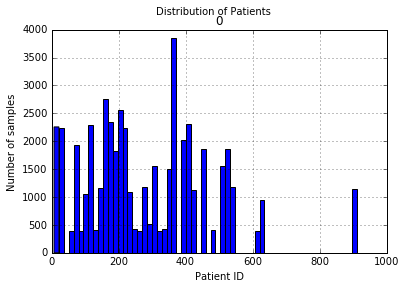

In [4]:
print(len(set(data[0])))
pd.DataFrame.hist(data,column = 0,bins = 62)
pl.suptitle("Distribution of Patients")
pl.xlabel("Patient ID")
pl.ylabel("Number of samples")

### Distribution of Labels

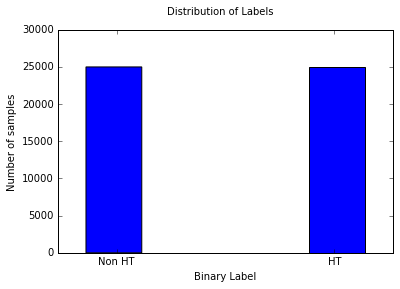

In [18]:
plt.hist(data[622],bins = 3, rwidth = 0.5)
plt.xticks([0.175, 1 - 0.175], ('Non HT', 'HT'))
pl.suptitle("Distribution of Labels")
pl.xlabel("Binary Label")
pl.ylabel("Number of samples")

We should ensure that the patients present in the training set shhould not be in the testing set at any cost. Hence, the patients with ids greater than 500 are in the testing set and the ids less than 500 are in the training set.  

In [20]:
def get_train_test(data,max_id):
    train_data = data[data[0]<max_id]
    test_data = data[data[0]>=max(max_id,500)]
    print(set(train_data[0]))
    print(set(test_data[0]))
    train_labels = train_data[622]
    test_labels = test_data[622]
    #print("here")
    train_features = train_data.drop([0,1,2,3,622],axis = 1) #dropping patient ID, and xyz coordinates.
    test_features = test_data.drop([0,1,2,3,622],axis = 1)
    print(train_data.shape)
    print(test_data.shape)
    return train_features,test_features,train_labels,test_labels
    

    

In [21]:
train_features,test_features,train_labels,test_labels = get_train_test(data, 470)
print(train_features.as_matrix())


{258, 387, 133, 390, 7, 392, 9, 18, 148, 406, 26, 155, 283, 156, 414, 154, 288, 34, 424, 168, 173, 177, 307, 312, 185, 189, 63, 448, 449, 67, 324, 69, 199, 201, 77, 334, 206, 81, 210, 212, 219, 97, 353, 356, 361, 110, 367, 240, 370, 371, 115, 120, 249}
{619, 525, 528, 913, 628, 538, 509, 511}
(42507, 623)
(7080, 623)
[[0.2125   0.19726  0.19421  ... 0.10893  0.10631  0.10478 ]
 [0.027484 0.03619  0.046603 ... 0.10913  0.10831  0.10667 ]
 [0.17421  0.17088  0.17446  ... 0.084188 0.082517 0.081374]
 ...
 [0.16355  0.16286  0.16051  ... 0.15017  0.1458   0.14687 ]
 [0.25799  0.23939  0.2196   ... 0.023806 0.024424 0.025042]
 [0.25658  0.24643  0.22427  ... 0.061313 0.062679 0.063878]]


(19678, 623)
(7080, 623)


d:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
d:\anaconda\lib\site-packages\ipykernel\__main__.py:43: DeprecationWarning: This function is deprecated. Please call randint(0, 7079 + 1) instead


0.8318041452949317
Original ROC area: 0.811
Confidence interval for the score: [0.800 - 0.822]
(27461, 623)
(7080, 623)


d:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
d:\anaconda\lib\site-packages\ipykernel\__main__.py:43: DeprecationWarning: This function is deprecated. Please call randint(0, 7079 + 1) instead


0.8373463659539223
Original ROC area: 0.846
Confidence interval for the score: [0.834 - 0.856]
(29835, 623)
(7080, 623)


d:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
d:\anaconda\lib\site-packages\ipykernel\__main__.py:43: DeprecationWarning: This function is deprecated. Please call randint(0, 7079 + 1) instead


0.8363564941690529
Original ROC area: 0.816
Confidence interval for the score: [0.805 - 0.825]
(37210, 623)
(7080, 623)


d:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
d:\anaconda\lib\site-packages\ipykernel\__main__.py:43: DeprecationWarning: This function is deprecated. Please call randint(0, 7079 + 1) instead


0.8329598835187861
Original ROC area: 0.879
Confidence interval for the score: [0.868 - 0.888]
(42507, 623)
(7080, 623)


d:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
d:\anaconda\lib\site-packages\ipykernel\__main__.py:43: DeprecationWarning: This function is deprecated. Please call randint(0, 7079 + 1) instead


0.8932317446825061
Original ROC area: 0.887
Confidence interval for the score: [0.879 - 0.895]
(42920, 623)
(7080, 623)


d:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
d:\anaconda\lib\site-packages\ipykernel\__main__.py:43: DeprecationWarning: This function is deprecated. Please call randint(0, 7079 + 1) instead


0.8930574869998243
Original ROC area: 0.890
Confidence interval for the score: [0.882 - 0.898]


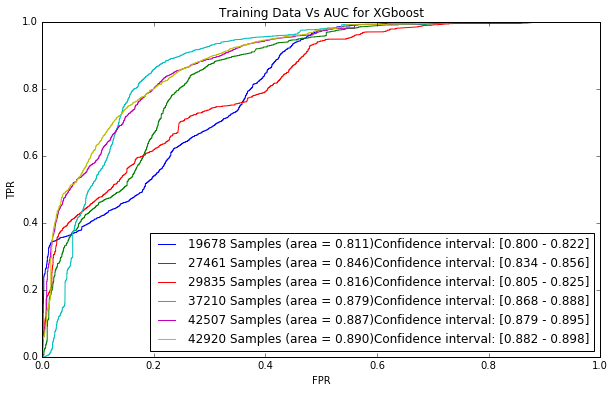

In [19]:
max_ids = [200,300,350,400,450,500]
plt.figure(figsize=(10,6))
plt.title("Training Data Vs AUC for XGboost")
plt.xlabel("FPR")
plt.ylabel("TPR")
max_auc_num = float("-inf")
best_model = 0 
import _pickle as pickle
for max_id in max_ids:
    train_features,test_features,train_labels,test_labels = get_train_test(data, max_id)
    train_features = train_features.as_matrix()
    test_features = test_features.as_matrix()
    train_labels = train_labels.as_matrix()
    test_labels = test_labels.as_matrix()
    model = XGBClassifier()
    model.fit(train_features,train_labels)
    test_preds = model.predict(test_features)
    test_preds_probs = model.predict_proba(test_features)
    fpr,tpr,thresholds = roc_curve(test_labels, test_preds_probs[:,1])
    #plot_tree(model)
    auc_num = auc(fpr, tpr)
    print(average_precision_score(test_labels, test_preds_probs[:,1]))
    print("Original ROC area: {:0.3f}".format(roc_auc_score(test_labels, test_preds_probs[:,1])))
    
    if auc_num > max_auc_num:
        best_model = model
        max_auc_num = auc_num
    
    n_bootstraps = 100
    rng_seed = 42  # control reproducibility
    bootstrapped_scores = []
    
    y_true = np.array(test_labels)
    y_pred = test_preds_probs[:,1]
    
    #print(y_pred.shape)
    #print(y_true.shape)
    

    rng = np.random.RandomState(rng_seed)
    for i in range(n_bootstraps):
        # bootstrap by sampling with replacement on the prediction indices
        indices = rng.random_integers(0, len(y_pred) - 1, len(y_pred))
        if len(np.unique(y_true[indices])) < 2:
            # We need at least one positive and one negative sample for ROC AUC
            # to be defined: reject the sample
            continue
        #print(y_true)
        #print(y_pred)
        score = roc_auc_score(y_true[indices], y_pred[indices])
        bootstrapped_scores.append(score)
        #print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))
    sorted_scores = np.array(bootstrapped_scores)
    sorted_scores.sort()

    # Computing the lower and upper bound of the 90% confidence interval
    # You can change the bounds percentiles to 0.025 and 0.975 to get
    # a 95% confidence interval instead.
    confidence_lower = sorted_scores[int(0.025 * len(sorted_scores))]
    confidence_upper = sorted_scores[int(0.975 * len(sorted_scores))]
    print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
        confidence_lower, confidence_upper))
    #print("Accuracy for data = " + str(train_features.shape[0])+ " = "+str(accuracy_score(test_labels,test_preds)))
    #print("AUC for data = " + str(train_features.shape[0])+ " = " + str(auc_num))
    plt.plot(fpr, tpr, label=str(train_features.shape[0]) + " Samples "+'(area = {:.3f})'.format(auc_num) + "Confidence interval: [{:0.3f} - {:0.3}]".format(
        confidence_lower, confidence_upper))
plt.legend(loc='best')
plt.show()
#pickle.dump(best_model, open("best_xgboost_model.pickle", "wb"))

{133, 7, 9, 18, 148, 154, 26, 155, 156, 34, 168, 173, 177, 185, 189, 63, 67, 69, 199, 77, 81, 97, 110, 115, 120}
{619, 525, 528, 913, 628, 538, 509, 511}
(19678, 623)
(7080, 623)
Original ROC area: 0.517
Confidence interval for the score: [0.509 - 0.523]


d:\anaconda\lib\site-packages\ipykernel\__main__.py:42: DeprecationWarning: This function is deprecated. Please call randint(0, 7079 + 1) instead


{258, 133, 7, 9, 18, 148, 154, 155, 26, 283, 156, 288, 34, 168, 173, 177, 185, 189, 63, 67, 69, 199, 201, 77, 206, 81, 210, 212, 219, 97, 110, 240, 115, 120, 249}
{619, 525, 528, 913, 628, 538, 509, 511}
(27461, 623)
(7080, 623)
Original ROC area: 0.575
Confidence interval for the score: [0.567 - 0.583]
{258, 133, 7, 9, 18, 148, 154, 155, 26, 283, 156, 288, 34, 168, 173, 177, 307, 312, 185, 189, 63, 67, 324, 69, 199, 201, 77, 334, 206, 81, 210, 212, 219, 97, 110, 240, 115, 120, 249}
{619, 525, 528, 913, 628, 538, 509, 511}
(29835, 623)
(7080, 623)
Original ROC area: 0.538
Confidence interval for the score: [0.530 - 0.547]
{258, 387, 133, 390, 7, 392, 9, 18, 148, 154, 155, 26, 283, 156, 288, 34, 168, 173, 177, 307, 312, 185, 189, 63, 67, 324, 69, 199, 201, 77, 334, 206, 81, 210, 212, 219, 97, 353, 356, 361, 110, 367, 240, 370, 371, 115, 120, 249}
{619, 525, 528, 913, 628, 538, 509, 511}
(37210, 623)
(7080, 623)
Original ROC area: 0.565
Confidence interval for the score: [0.557 - 0.571]


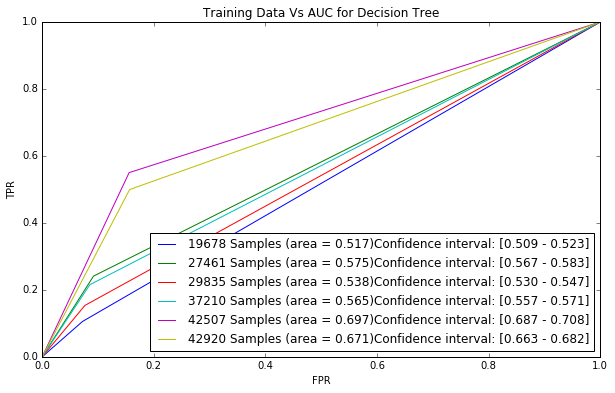

In [23]:
max_ids = [200,300,350,400,450,500]
plt.figure(figsize=(10,6))
plt.title("Training Data Vs AUC for Decision Tree")
plt.xlabel("FPR")
plt.ylabel("TPR")
max_auc_num = float("-inf")
best_model = 0 
for max_id in max_ids:
    train_features,test_features,train_labels,test_labels = get_train_test(data, max_id)
    #train_features = train_features.as_matrix()
    train_features = train_features.as_matrix()
    test_features = test_features.as_matrix()
    train_labels = train_labels.as_matrix()
    test_labels = test_labels.as_matrix()
    model = DecisionTreeClassifier()
    model.fit(train_features,train_labels)
    test_preds = model.predict(test_features)
    test_preds_probs = model.predict_proba(test_features)
    fpr,tpr,thresholds = roc_curve(test_labels, test_preds_probs[:,1])
    #plot_tree(model)
    auc_num = auc(fpr, tpr)
    print("Original ROC area: {:0.3f}".format(roc_auc_score(test_labels, test_preds_probs[:,1])))
    
    if auc_num > max_auc_num:
        best_model = model
        max_auc_num = auc_num
    
    n_bootstraps = 100
    rng_seed = 42  # control reproducibility
    bootstrapped_scores = []
    
    y_true = np.array(test_labels)
    y_pred = test_preds_probs[:,1]
    
    #print(y_pred.shape)
    #print(y_true.shape)
    

    rng = np.random.RandomState(rng_seed)
    for i in range(n_bootstraps):
        # bootstrap by sampling with replacement on the prediction indices
        indices = rng.random_integers(0, len(y_pred) - 1, len(y_pred))
        if len(np.unique(y_true[indices])) < 2:
            # We need at least one positive and one negative sample for ROC AUC
            # to be defined: reject the sample
            continue
        #print(y_true)
        #print(y_pred)
        score = roc_auc_score(y_true[indices], y_pred[indices])
        bootstrapped_scores.append(score)
        #print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))
    sorted_scores = np.array(bootstrapped_scores)
    sorted_scores.sort()

    # Computing the lower and upper bound of the 90% confidence interval
    # You can change the bounds percentiles to 0.025 and 0.975 to get
    # a 95% confidence interval instead.
    confidence_lower = sorted_scores[int(0.025 * len(sorted_scores))]
    confidence_upper = sorted_scores[int(0.975 * len(sorted_scores))]
    print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
        confidence_lower, confidence_upper))
    #print("Accuracy for data = " + str(train_features.shape[0])+ " = "+str(accuracy_score(test_labels,test_preds)))
    #print("AUC for data = " + str(train_features.shape[0])+ " = " + str(auc_num))
    plt.plot(fpr, tpr, label=str(train_features.shape[0]) + " Samples "+'(area = {:.3f})'.format(auc_num) + "Confidence interval: [{:0.3f} - {:0.3}]".format(
        confidence_lower, confidence_upper))
plt.legend(loc='best')
plt.show()
pickle.dump(best_model, open("best_dtree_model.pickle", "wb"))